In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import viz

In [2]:
def getdist(path, dist):
    df = pd.read_csv(path, sep='\t')
    return df[dist].values

pf = hm.ParaFrame('cache/SPO2023/summ_SgrA/SgrA_a{aspin:g}_i30_230.e9.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

aspin [-0.94 -0.5   0.    0.5   0.94]


In [25]:
eht_fwhm_upper = 95
eht_fwhm_lower = 38
eht_fwhm_upper_deblur = 93.61
eht_fwhm_lower_deblur = 34.38

In [15]:
def plot_FWHM(ax, pf, key, color):

    dists = [getdist(p, key) for p in pf.path]
    
    violin_parts = ax.violinplot(dists, widths=20, showmedians=True, showextrema=False)
    ax.set_ylim(0, 150)
    
    for pc in violin_parts['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        
    pc = violin_parts['cmedians']
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    return dists

def plot_major(ax, pf):
    dists = plot_FWHM(ax, pf, 'major_FWHM', 'blue')
    ax.axhline(eht_fwhm_lower_deblur, xmin=-10, xmax=10,
               color='blue', ls='--', alpha=1, linewidth=2)
    for kk, distdat in enumerate(dists):
        if np.median(distdat) < eht_fwhm_lower_deblur: 
            print(f'spin={pf.aspin.iloc[0]} is too small!')

def plot_minor(ax, pf):
    dists = plot_FWHM(ax, pf, 'minor_FWHM', 'orange')
    ax.axhline(eht_fwhm_upper_deblur, xmin=-10, xmax=10,
               color='orange', ls='--', alpha=1, linewidth=2)
    for kk, distdat in enumerate(dists):
        if np.median(distdat) > eht_fwhm_upper_deblur: 
            print(f'spin={pf.aspin.iloc[0]} is too large!')

def vizrow(plot, ylim=None, ylabel=None):
    fig, axes = plt.subplots(1,5, figsize=(11,4), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0, hspace=0)

    for a, ax in enumerate(axes):
        sel = pf(aspin=aspin[a])
        ax = axes[a]
        ax.set_title(aspin[a])
        plot(ax, sel)

        if ylim != None:
            ax.set_ylim(ylim[0], ylim[1])

        ax.tick_params(
            axis='both',
            direction='in',
            top=True,
            right=True,
            color='w',
        )
        for spine in ax.spines.values():
            spine.set_edgecolor('w')

    
    if ylabel != None:
        axes[0].set_ylabel(ylabel)

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

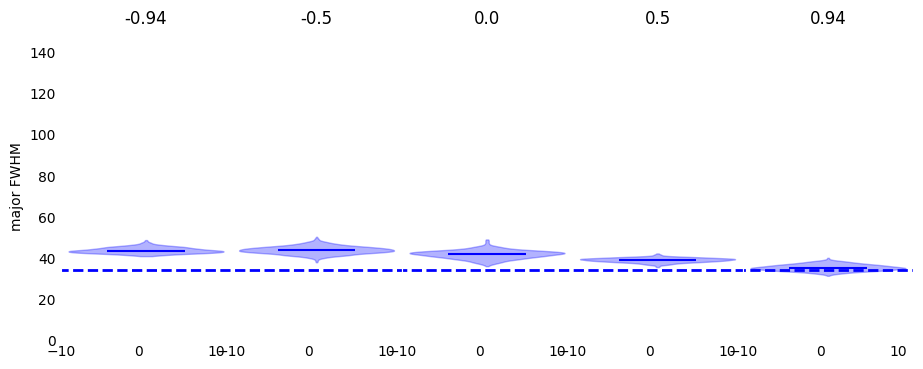

In [16]:
vizrow(plot_major, ylabel='major FWHM')

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

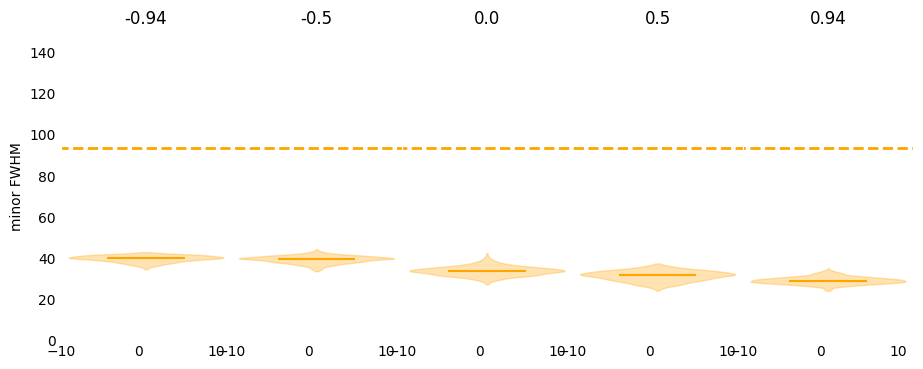

In [17]:
vizrow(plot_minor, ylabel='minor FWHM')

In [23]:
def plot_Gaussian(ax, pf):
    
    dists = [np.sqrt(0.5*(getdist(p, 'major_FWHM')**2 + getdist(p, 'minor_FWHM')**2)) for p in pf.path]
    
    violin_parts = ax.violinplot(dists, widths=20, showmedians=True, showextrema=False)
    ax.set_ylim(0, 150)
    
    color='green'
    
    for pc in violin_parts['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        
    pc = violin_parts['cmedians']
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    ax.axhline(eht_fwhm_upper_deblur, xmin=-10, xmax=10, 
               color=color, ls='--', alpha=1, linewidth=2)
    
    ax.axhline(eht_fwhm_lower_deblur, xmin=-10, xmax=10, 
               color=color, ls='--', alpha=1, linewidth=2)
    
    for kk,distdat in enumerate(dists):

        if np.median(distdat) > eht_fwhm_upper_deblur: 
            print(f'spin={pf.aspin.iloc[0]} is too large!')
            
        if np.median(distdat) < eht_fwhm_lower_deblur: 
            print(f'spin={pf.aspin.iloc[0]} is too small!')

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

spin=0.94 is too small!


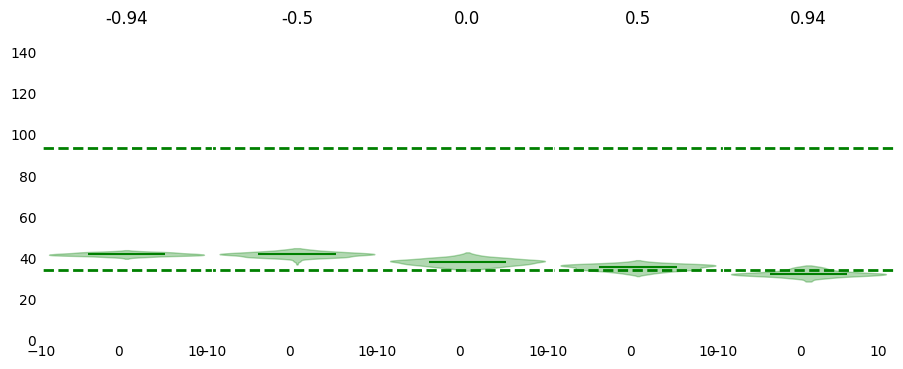

In [24]:
vizrow(plot_Gaussian)

In [34]:
def plot_bracket(ax, pf):
        
    dists_major = plot_FWHM(ax, pf, 'major_FWHM', 'blue')
    dists_minor = plot_FWHM(ax, pf, 'minor_FWHM', 'orange')
       
    color='black'
    ax.axhline(eht_fwhm_upper, xmin=-10, xmax=10, 
                       color=color, ls='--',alpha=1, linewidth=2)

    for kk, i in enumerate([0]):
        distdata_major = dists_major
        if not (np.min(distdata_minor) < eht_fwhm_upper < np.max(distdata_major)):
            print(f'spin={pf.aspin.iloc[0]} fails!')

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

34.513288915273215
spin=-0.94 fails!
33.57575332353735
spin=-0.5 fails!
27.19601706961385
spin=0.0 fails!
24.07112859032514
spin=0.5 fails!
24.057711722548635
spin=0.94 fails!


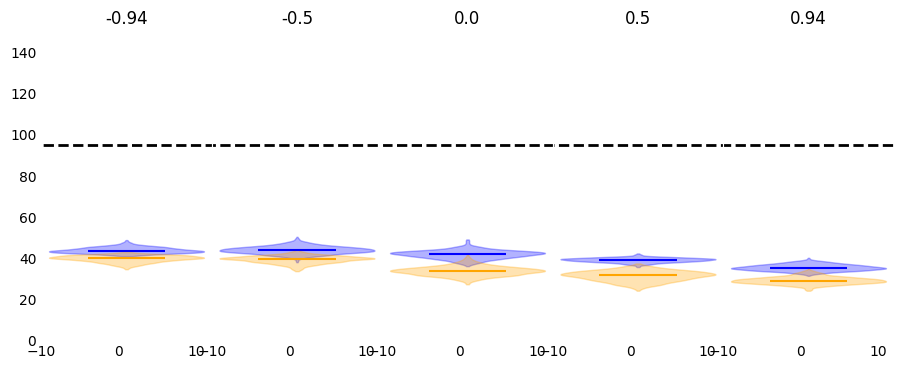

In [35]:
vizrow(plot_bracket)